In [178]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special

from scipy.integrate import quad
from scipy.constants import mu_0


In [187]:
def integrate(func,r,n=1000,**kwargs):
    i_sum = 0
    dr = r/n
    
    for i in range(1,n+1):
        r_i = dr*(i-1)
        r_a = dr*i

        a = (np.pi*r_a**2) - (np.pi*r_i**2)

        j_i = func(r_i,**kwargs)
        j_a = func(r_a,**kwargs)

        j_m = (j_i+j_a)/2

        i_i = j_m*a
        i_sum += i_i
    return i_sum

n:1
3.499021684526361
I=397.59499999999963 and P=6.878170305306605

n:2
2.020161111461632
I=384.41400000000016 and P=9.268620328608234

n:3
1.564810068269353
I=359.1000000000003 and P=9.873555590312604

n:4
1.3225058870398643
I=323.6340000000001 and P=9.217231434349737

n:5
1.1663405615087867
I=280.7240000000001 and P=7.720201508229042

n:6
1.0549947328082943
I=233.52400000000017 and P=5.830064424447697

n:7
0.9704540075015519
I=185.31700000000006 and P=3.9525257967586707

n:8
0.9034435141459477
I=139.19300000000007 and P=2.376911880889052

n:9
0.8486374112722835
I=97.773 and P=1.2407313841954557

P=56.3580126530971 W


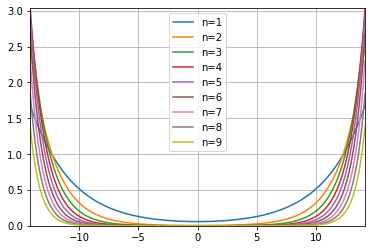

In [238]:
r= np.sqrt(630/np.pi)
mu_r = 1


list_i = (
    (397.595,50),
    (384.414,150), 
    (359.100,250),
    (323.634,350),
    (280.724,450),
    (233.524,550),
    (185.317,650),
    (139.193,750),
    (97.773,850)
)

j_0_max = None
p_sum = 0



n=0
for i, f in list_i:
    n += 1
    print(f'n:{n}')
    
    d = 1 /np.exp(1) * np.sqrt(1/(56* mu_0*mu_r * np.pi *f)) # S *m / mm^2 * Vs/(Am) *
    print(d)

    x = np.linspace(-r,r,num=1000)

    def j(x,j_0 = 1):
        return j_0 * (np.exp(-(x+r)/d) + np.exp((x-r)/d))


    def p(j_0, n = 1000,g = 56):
        p = 0
        dr = r/n
        for i in range(1,n+1):
            r_i = dr*(i-1)
            r_a = dr*i

            a = (np.pi*r_a**2) - (np.pi*r_i**2)

            j_i = j(r_i, j_0=j_0)
            j_a = j(r_a, j_0=j_0)

            j_m = (j_i+j_a)/2

            i_i = j_m*a

            r_l = 1/(g*a)
            p += i_i**2 * r_l
        return p


    j_0 = i/integrate(j,r)
    
    if j_0_max is None or j_0_max < j_0:
        j_0_max = j_0
    
    p_i = p(j_0)
    p_sum += p_i
    
    print(f'I={integrate(j,r,j_0=j_0)} and P={p_i}')
    print()

    plt.plot(x,j(x,j_0),label=f'n={n}')

plt.grid()
plt.xlim((-r,r))
plt.ylim((0,j_0_max))
plt.legend()

print(f'P={p_sum} W')
